In [ ]:
#Library
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Graphic Draw

#İnput File
import os
for dirname, _, filenames in os.walk('/content/Cancer_Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
#Data Loading
data = pd.read_csv('/content/Cancer_Data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7069 non-null   int64  
 1   diagnosis                7069 non-null   object 
 2   radius_mean              7069 non-null   float64
 3   texture_mean             7069 non-null   float64
 4   perimeter_mean           7069 non-null   float64
 5   area_mean                7069 non-null   float64
 6   smoothness_mean          7069 non-null   float64
 7   compactness_mean         7069 non-null   float64
 8   concavity_mean           7069 non-null   float64
 9   concave points_mean      7069 non-null   float64
 10  symmetry_mean            7069 non-null   float64
 11  fractal_dimension_mean   7069 non-null   float64
 12  radius_se                7069 non-null   float64
 13  texture_se               7069 non-null   float64
 14  perimeter_se            

In [ ]:
# Split the data by x and y
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis = 1)

In [ ]:
print("X Data graph")
pd.DataFrame(x_data)

X Data graph


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,903507,15.569169,19.485948,104.076888,759.044482,0.115447,0.156067,0.189549,0.091321,0.192058,...,21.242739,29.525003,140.027678,1334.186253,0.170381,0.397327,0.538972,0.215640,0.319966,0.102919
7065,871001502,7.966553,20.748336,53.800561,216.511960,0.095183,0.132048,0.127658,0.023709,0.221398,...,9.094754,29.514809,58.904742,210.908816,0.161268,0.427814,0.548028,0.076121,0.333459,0.148627
7066,911201,14.496134,13.867035,95.359277,649.863590,0.109103,0.090544,0.077245,0.062300,0.164608,...,15.487196,16.670757,105.017013,700.877626,0.136169,0.142137,0.127001,0.107804,0.262949,0.078581
7067,895100,20.359380,21.875775,136.634680,1260.542816,0.117188,0.189883,0.253928,0.149437,0.255541,...,25.239287,31.613233,171.458942,1927.301386,0.158936,0.453910,0.534013,0.267870,0.553844,0.101625


In [ ]:
print("Y Data Graph")
pd.DataFrame(y)

Y Data Graph


,0
0,M
1,M
2,M
3,M
4,M
...,...
7064,M
7065,B
7066,B
7067,M


In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
pd.DataFrame(x)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000924,2.045916e-08,1.210864e-08,1.354681e-07,1.099125e-06,8.484976e-10,1.023189e-09,1.047879e-09,8.799904e-10,9.840153e-10,...,2.856827e-08,1.973494e-08,2.032818e-07,2.216185e-06,8.965598e-10,1.448945e-09,1.499750e-09,1.009802e-09,1.223448e-09,8.490463e-10
1,0.000925,2.329022e-08,2.021775e-08,1.465509e-07,1.455750e-06,8.115622e-10,8.048686e-10,8.139324e-10,7.955744e-10,9.174086e-10,...,2.814032e-08,2.640658e-08,1.749712e-07,2.147055e-06,8.544231e-10,9.233341e-10,9.836861e-10,9.226757e-10,1.020336e-09,8.162587e-10
2,0.092504,2.232459e-08,2.403639e-08,1.433687e-07,1.320781e-06,8.388413e-10,8.940359e-10,9.351850e-10,8.589221e-10,9.456095e-10,...,2.658214e-08,2.873287e-08,1.680582e-07,1.876019e-06,8.770277e-10,1.184384e-09,1.212804e-09,9.852223e-10,1.115034e-09,8.146786e-10
3,0.092556,1.324984e-08,2.308173e-08,8.584779e-08,4.243895e-07,8.749428e-10,1.030102e-09,9.834666e-10,8.340131e-10,1.003547e-09,...,1.707945e-08,2.979726e-08,1.092095e-07,6.236608e-07,9.487916e-10,1.669175e-09,1.472318e-09,1.001133e-09,1.446970e-09,9.084107e-10
4,0.092567,2.298297e-08,1.645398e-08,1.489650e-07,1.423928e-06,8.286363e-10,8.642989e-10,9.358434e-10,8.330256e-10,9.170794e-10,...,2.545192e-08,1.901071e-08,1.677290e-07,1.728980e-06,8.693465e-10,9.435246e-10,1.157500e-09,8.968889e-10,9.779801e-10,8.028276e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,0.000991,1.780276e-08,2.210068e-08,1.149231e-07,8.336248e-07,8.452576e-10,8.898297e-10,9.265697e-10,8.187840e-10,9.293236e-10,...,2.402842e-08,3.311662e-08,1.543722e-07,1.464733e-06,9.055371e-10,1.154567e-09,1.309995e-09,9.551999e-10,1.069677e-09,8.315098e-10
7065,0.955758,9.460345e-09,2.348591e-08,5.975440e-08,2.382991e-07,8.230215e-10,8.634736e-10,8.586565e-10,7.445922e-10,9.615182e-10,...,1.069833e-08,3.310544e-08,6.535527e-08,2.321507e-07,8.955375e-10,1.188021e-09,1.319933e-09,8.021050e-10,1.084484e-09,8.816656e-10
7066,0.001000,1.662531e-08,1.593500e-08,1.053571e-07,7.138196e-07,8.382955e-10,8.179312e-10,8.033382e-10,7.869387e-10,8.992025e-10,...,1.771281e-08,1.901154e-08,1.159547e-07,7.697978e-07,8.679961e-10,8.745439e-10,8.579356e-10,8.368709e-10,1.007112e-09,8.048039e-10
7067,0.000982,2.305910e-08,2.472306e-08,1.506490e-07,1.383923e-06,8.471677e-10,9.269365e-10,9.972134e-10,8.825548e-10,9.989831e-10,...,2.841387e-08,3.540805e-08,1.888620e-07,2.115563e-06,8.929776e-10,1.216656e-09,1.304553e-09,1.012513e-09,1.326314e-09,8.300900e-10


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Matrkis Transpoz
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [ ]:
def initialize_weights_and_bias(dimension):

    w=np.full((dimension,1),0.01)
    b = 0.0

    return w,b



def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def forward_bacward_propagation(w,b,x_train,y_train):
    #FORWARD
    z = np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]

    #BACKWARD
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias= np.sum(y_head-y_train)/x_train.shape[1]

    gradients = {"derivative_weight": derivative_weight, "derivative_bias":derivative_bias}
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration): #number of iteration kaç tur denenceğini söyler deneme yanımayla bulunur
    cost_list =[]
    cost_list2 = []
    index =  []


    #updating(Learning) parameters is number_of_iteration times
    print("  Cost Results after iteration \n","-------------------------------------------")
    for i in range(number_of_iteration):
       # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_bacward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
       #lets update

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))

    print("-------------------------------------------")
    # we update(learn) parameters wights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of İteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
     #x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
     #if z is bigger than 0.5 our prediction is sign one (y_head = 1)
     #if z is smaller than 0.5 our prediction is sign one (y_head = 0)
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
             Y_prediction[0,i] = 1

    return Y_prediction

Iteration 0 | Cost: 0.6730162113828685
Iteration 100 | Cost: 0.24835191400917564
Iteration 200 | Cost: 0.188186550637689


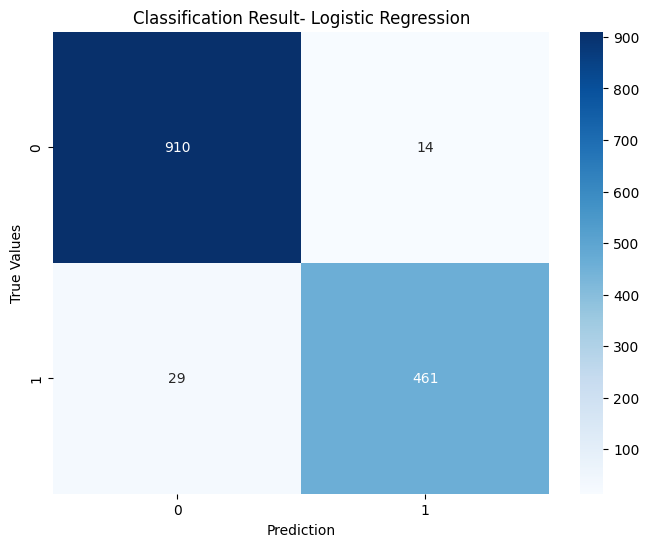


Result Evaluation 
 ------------------------------------

Sum True Prediction: 1371
Sum False Prediction: 43
Test Accuracy: 96.96 %
Precision: 0.97
Recall: 0.94
F1 Score: 0.96
AUC-ROC: 0.96


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_weights_and_bias(dimension):
    w = np.zeros((dimension, 1))
    b = 0
    return w, b

# Cost function with regularization
def compute_cost(w, b, x_train, y_train, lambda_reg):
    m = x_train.shape[1]
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    cost = - (1 / m) * np.sum(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    reg_cost = (lambda_reg / (2 * m)) * np.sum(np.square(w))  # Regularization term
    total_cost = cost + reg_cost
    return total_cost

# Gradient descent with regularization
def update(w, b, x_train, y_train, learning_rate, num_iterations, lambda_reg):
    m = x_train.shape[1]
    cost_list = []

    for i in range(num_iterations):
        # Forward pass
        z = np.dot(w.T, x_train) + b
        y_head = sigmoid(z)

        # Backward pass
        dw = (1 / m) * np.dot(x_train, (y_head - y_train).T) + (lambda_reg / m) * w  # Regularization
        db = (1 / m) * np.sum(y_head - y_train)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost
        cost = compute_cost(w, b, x_train, y_train, lambda_reg)
        cost_list.append(cost)

        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i} | Cost: {cost}")

    parameters = {"weight": w, "bias": b}
    gradients = {"dw": dw, "db": db}
    return parameters, gradients, cost_list

# Function to make predictions
def predict(w, b, x_test):
    z = np.dot(w.T, x_test) + b
    y_head = sigmoid(z)
    return (y_head > 0.5).astype(int).flatten()  # Convert to 1D array

# Logistic Regression Function
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations, lambda_reg=0.01):
    # Encode 'M' as 1 and 'B' as 0
    y_train = np.where(y_train == 'M', 1, 0)
    y_test = np.where(y_test == 'M', 1, 0)

    # Feature Scaling (Standardization)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train.T).T  # Standardize the features
    x_test = scaler.transform(x_test.T).T  # Use the same scaler for test data

    # Initialize weights and bias
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Perform the optimization
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations, lambda_reg)

    # Make predictions
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)

    # Confusion Matrix and Plot
    cm = confusion_matrix(y_test, y_prediction_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Prediction')
    plt.ylabel('True Values')
    plt.title('Classification Result- Logistic Regression')
    plt.show()

    # Evaluate results
    print("\nResult Evaluation \n", "------------------------------------\n")
    correct_predictions = np.trace(cm)
    total_predictions = np.sum(cm)
    incorrect_predictions = total_predictions - correct_predictions

    print(f'Sum True Prediction: {correct_predictions}')
    print(f'Sum False Prediction: {incorrect_predictions}')

    # Accuracy and other metrics
    accuracy = accuracy_score(y_test, y_prediction_test)
    precision = precision_score(y_test, y_prediction_test)
    recall = recall_score(y_test, y_prediction_test)
    f1 = f1_score(y_test, y_prediction_test)
    auc_roc = roc_auc_score(y_test, y_prediction_test)

    print(f"Test Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")

# Example call (with appropriate data)
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=300, lambda_reg=0.01)


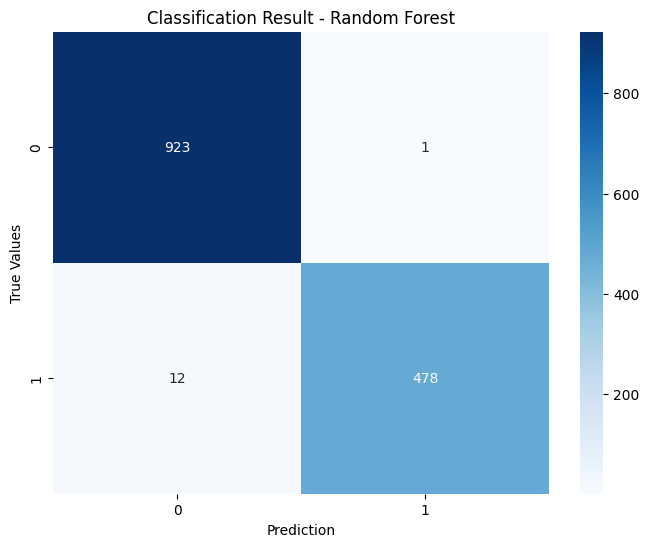


Result Evaluation 
 ------------------------------------

Sum True Prediction: 1401
Sum False Prediction: 13
Test Accuracy: 99.08 %
Precision: 1.00
Recall: 0.98
F1 Score: 0.99
AUC-ROC: 0.99


In [ ]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Function for Random Forest Algorithm
def random_forest_classification(x_train, y_train, x_test, y_test, n_estimators=100, max_depth=None, random_state=42):
    # Encode 'M' as 1 and 'B' as 0
    y_train = np.where(y_train == 'M', 1, 0)
    y_test = np.where(y_test == 'M', 1, 0)

    # Feature Scaling (Standardization)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train.T).T  # Standardize the features
    x_test = scaler.transform(x_test.T).T  # Use the same scaler for test data

    # Initialize Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf.fit(x_train.T, y_train)  # Train the model

    # Make predictions
    y_prediction_test = rf.predict(x_test.T)

    # Confusion Matrix and Plot
    cm = confusion_matrix(y_test, y_prediction_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Prediction')
    plt.ylabel('True Values')
    plt.title('Classification Result - Random Forest')
    plt.show()

    # Evaluate results
    print("\nResult Evaluation \n", "------------------------------------\n")
    correct_predictions = np.trace(cm)
    total_predictions = np.sum(cm)
    incorrect_predictions = total_predictions - correct_predictions

    print(f'Sum True Prediction: {correct_predictions}')
    print(f'Sum False Prediction: {incorrect_predictions}')

    # Accuracy and other metrics
    accuracy = accuracy_score(y_test, y_prediction_test)
    precision = precision_score(y_test, y_prediction_test)
    recall = recall_score(y_test, y_prediction_test)
    f1 = f1_score(y_test, y_prediction_test)
    auc_roc = roc_auc_score(y_test, y_prediction_test)

    print(f"Test Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")

# Example call (with appropriate data)
random_forest_classification(x_train, y_train, x_test, y_test, n_estimators=300, max_depth=5)


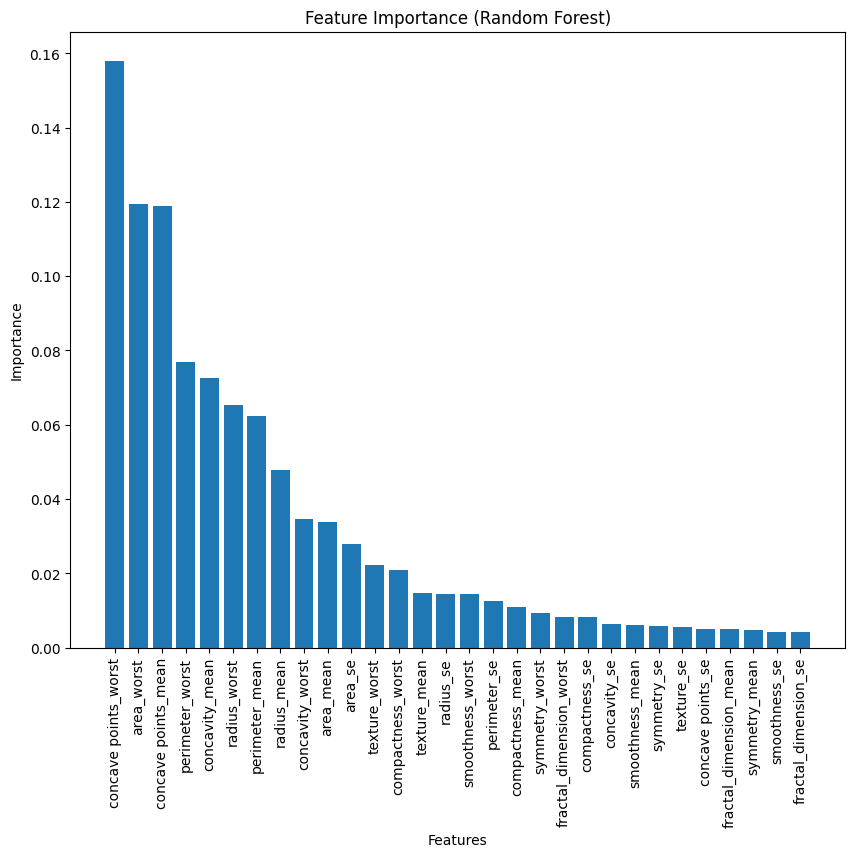

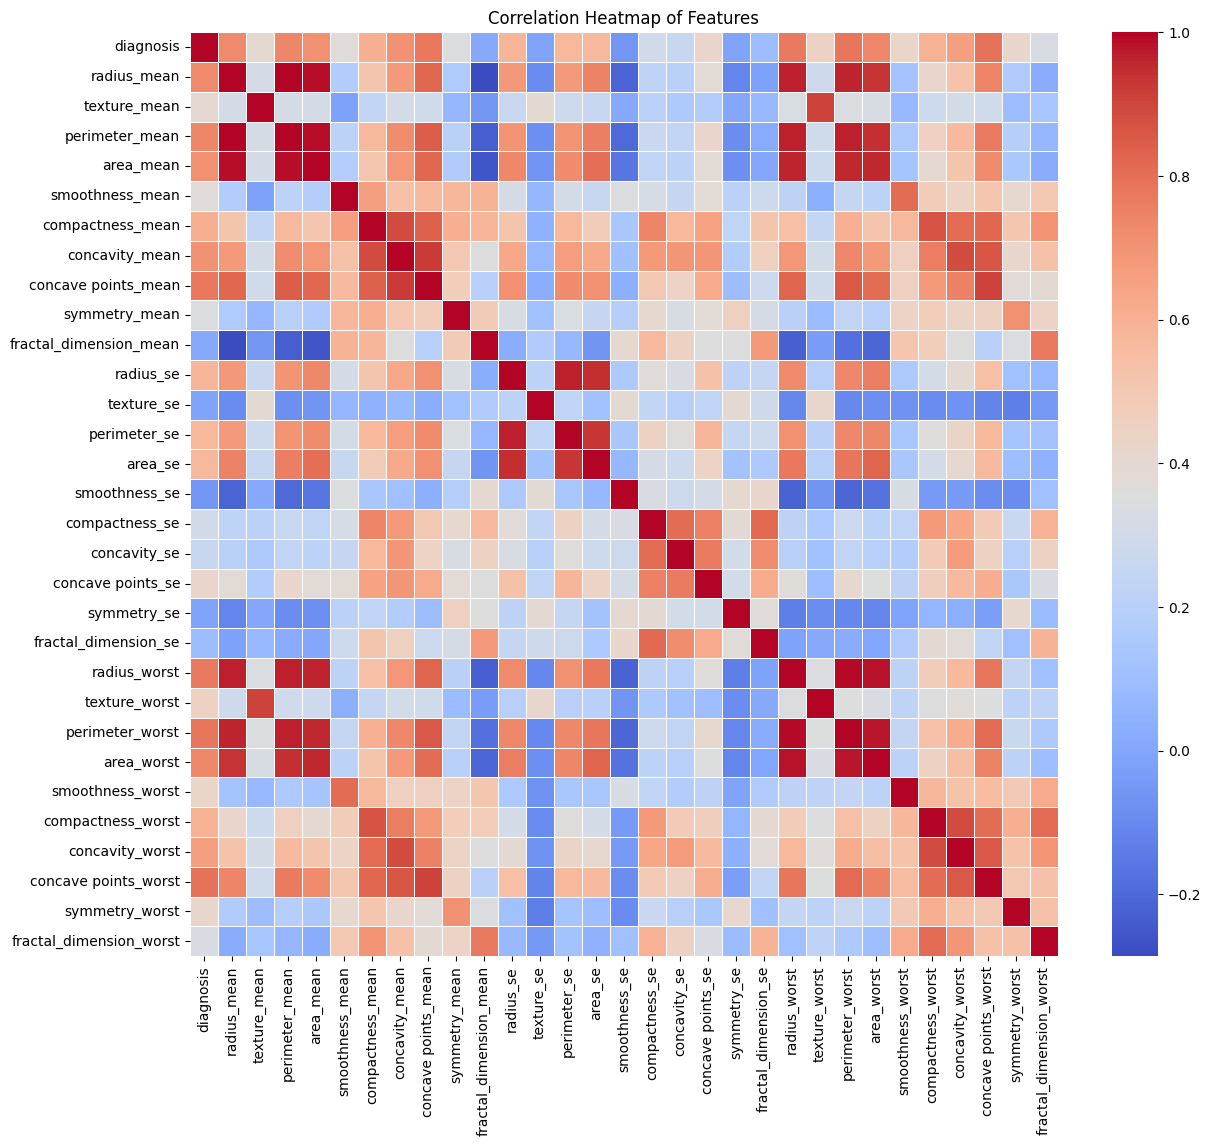

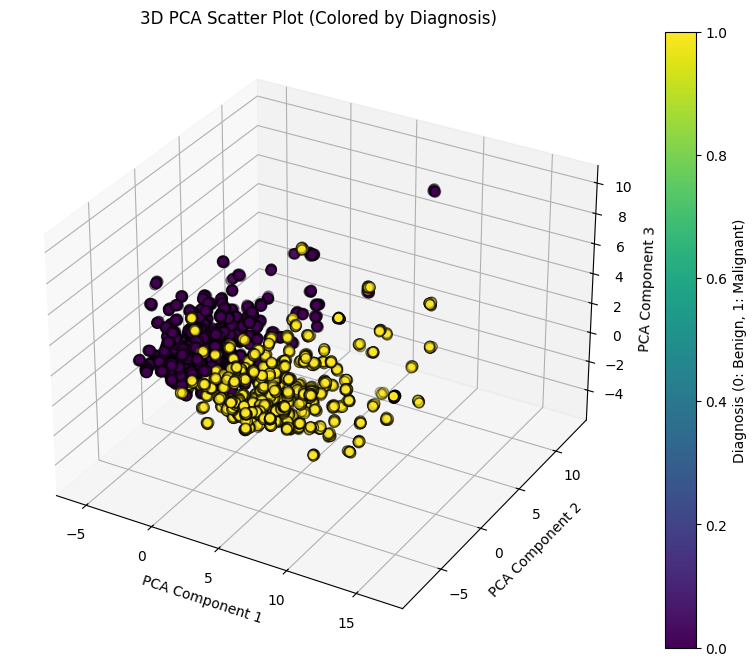

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load the data
data = pd.read_csv('/content/Cancer_Data.csv')
data = data.drop(columns=['id'])  # Drop the 'id' column if not needed

# Encode diagnosis (M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split the dataset
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train both models
rf_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)

# ----------- Visualization 1: Feature Importance Plot (Random Forest) -----------
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 8))
    plt.title("Feature Importance (Random Forest)")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()

plot_feature_importance(rf_model, X.columns)

# ----------- Visualization 2: Correlation Heatmap -----------
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# ----------- Visualization 3: PCA 3D Scatter Plot with Diagnosis Color -----------
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="viridis", edgecolor='k', s=50)
plt.colorbar(sc, label='Diagnosis (0: Benign, 1: Malignant)')
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.title("3D PCA Scatter Plot (Colored by Diagnosis)")
plt.show()
